In [ ]:
import kagglehub
stephanmatzka_predictive_maintenance_dataset_ai4i_2020_path = kagglehub.dataset_download('stephanmatzka/predictive-maintenance-dataset-ai4i-2020')


print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14
features in columns

UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
type: just the product type L, M or H from column 2
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes

tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.




In [ ]:
df=pd.read_csv("/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv")
df # Displaying dataset to understand the structure

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
df[df["Machine failure"]==1] #data points shows Machine Failure

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
# Checking for null values and duplicates
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
# Understanding data types and unique values per column
df.dtypes
df.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Machine failure,2
TWF,2


In [ ]:
df['Type'].value_counts()
df.drop(columns=['UDI','Product ID'],inplace=True)

Feature Engineering

In [ ]:
# Creating new feature: temperature difference between process and air
df['temperature_difference']=df['Process temperature [K]']-df['Air temperature [K]']

In [ ]:
# Creating new feature: mechanical power using torque and rotational speed
df['Mechanical Power [W]']=np.round((df['Torque [Nm]']*df['Rotational speed [rpm]']* 2 * np.pi) / 60,4)

In [ ]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temperature_difference,Mechanical Power [W]
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.5906
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.7227
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.3875
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.5047
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,4955.1294
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,5434.7040
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,5753.6175
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,7151.1026


In [ ]:
df.describe().T #statistical_description

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.004930,2.000259,295.3000,298.3000,300.10000,301.5000,304.500
Process temperature [K],10000.0,310.005560,1.483734,305.7000,308.8000,310.10000,311.1000,313.800
Rotational speed [rpm],10000.0,1538.776100,179.284096,1168.0000,1423.0000,1503.00000,1612.0000,2886.000
Torque [Nm],10000.0,39.986910,9.968934,3.8000,33.2000,40.10000,46.8000,76.600
Tool wear [min],10000.0,107.951000,63.654147,0.0000,53.0000,108.00000,162.0000,253.000
Machine failure,10000.0,0.033900,0.180981,0.0000,0.0000,0.00000,0.0000,1.000
TWF,10000.0,0.004600,0.067671,0.0000,0.0000,0.00000,0.0000,1.000
HDF,10000.0,0.011500,0.106625,0.0000,0.0000,0.00000,0.0000,1.000
PWF,10000.0,0.009500,0.097009,0.0000,0.0000,0.00000,0.0000,1.000
OSF,10000.0,0.009800,0.098514,0.0000,0.0000,0.00000,0.0000,1.000


1) Plotting the Distribution of Machine Types
Helps you to see how many machines belong to each type (L, M, H)

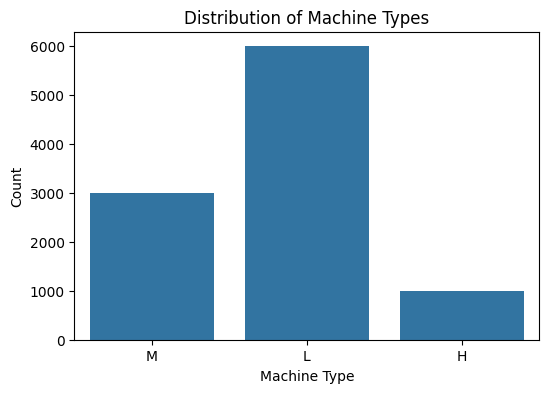

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Machine Types')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.show()


2) Visualizing Failure Distribution Across Product Types

Shows how failures are spread across types — are some types failing more?

\

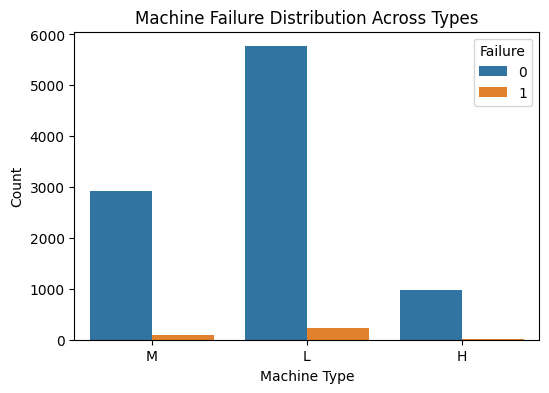

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', hue='Machine failure', data=df)
plt.title('Machine Failure Distribution Across Types')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.legend(title='Failure')
plt.show()


3) Plotting Feature Distributions to Observe Patterns or Anomalies

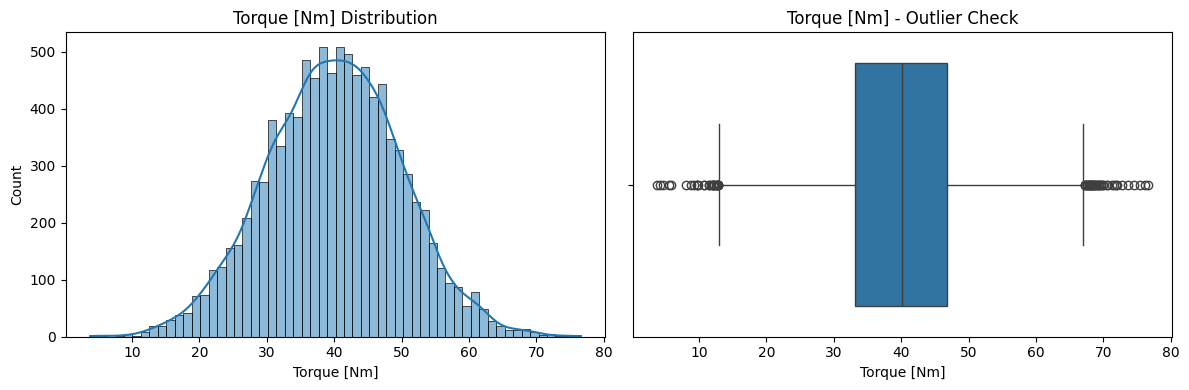

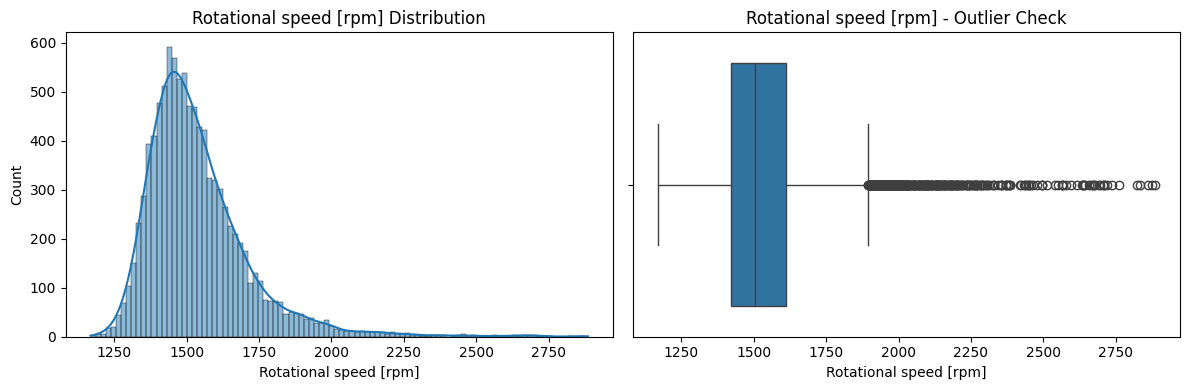

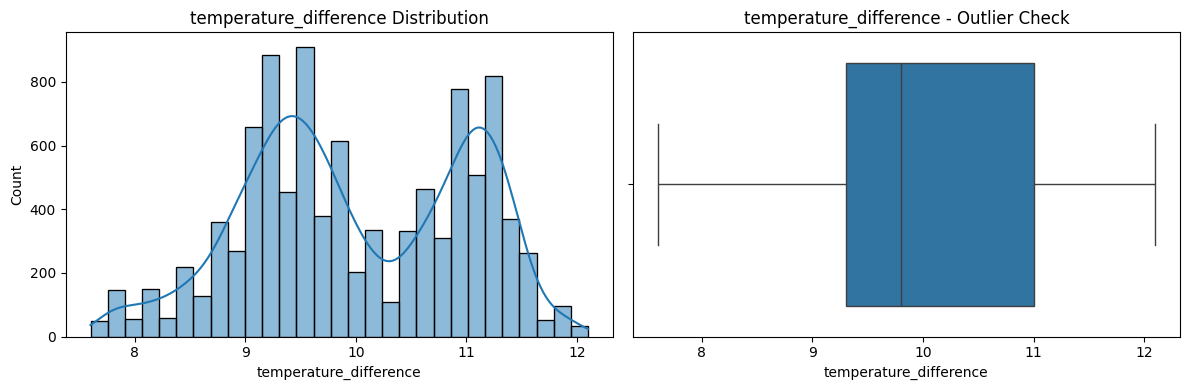

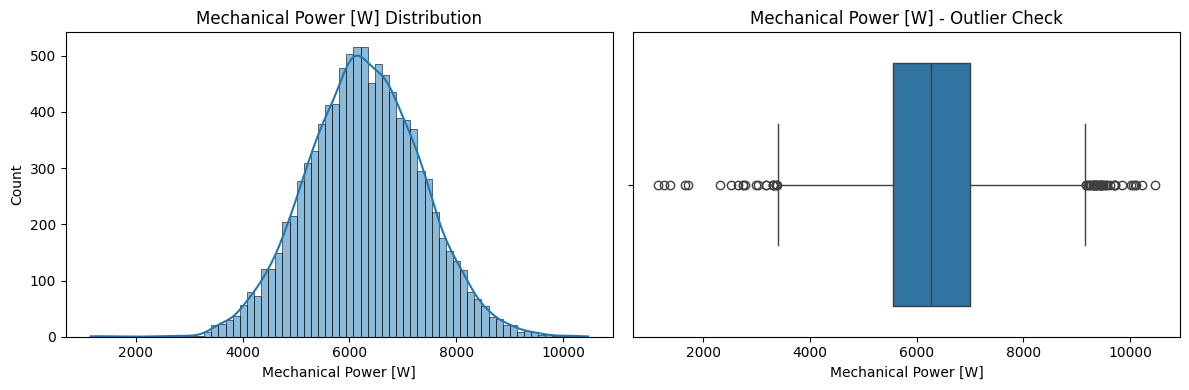

In [ ]:
cols = ['Torque [Nm]', 'Rotational speed [rpm]', 'temperature_difference', 'Mechanical Power [W]']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

    plt.tight_layout()
    plt.show()

4) Pairplot for Feature Relationships

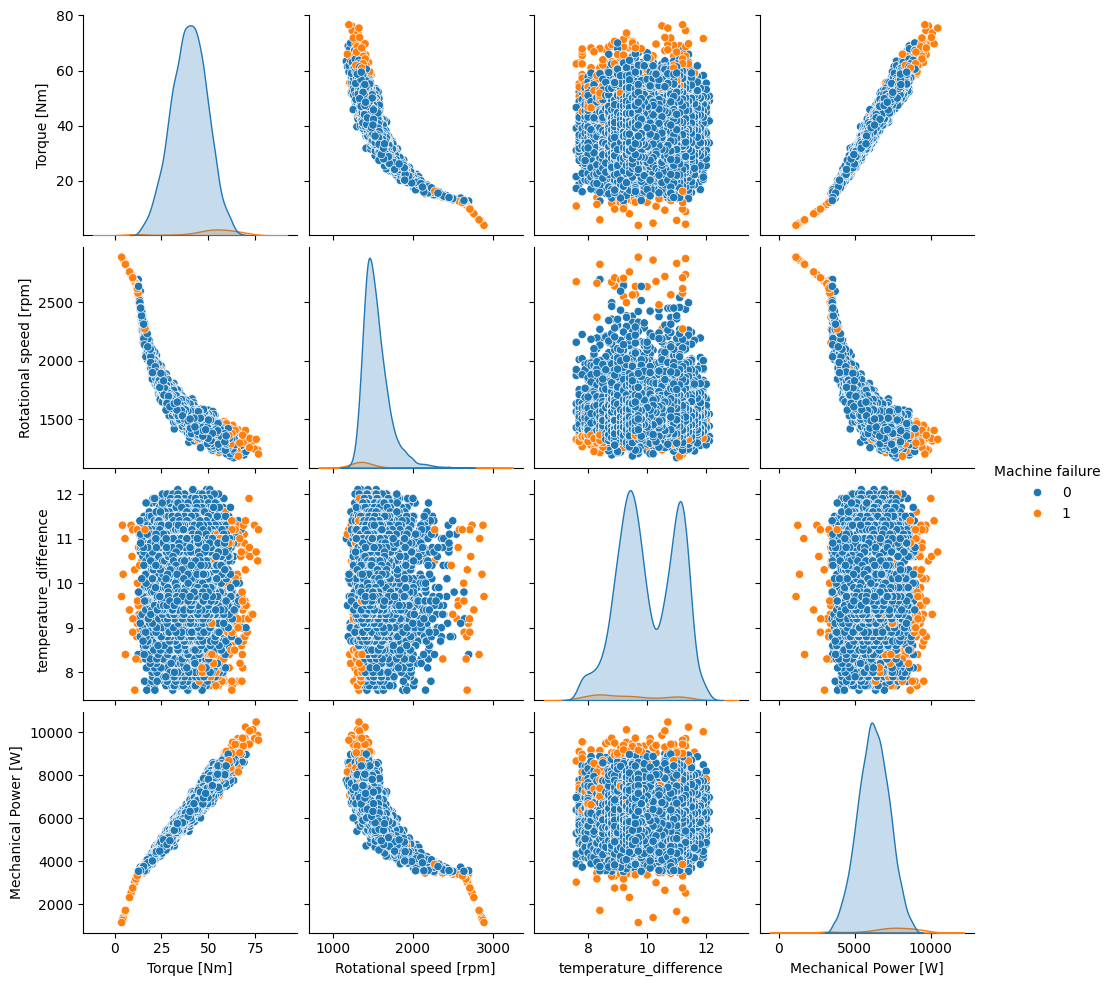

In [ ]:
sns.pairplot(df[['Torque [Nm]', 'Rotational speed [rpm]', 'temperature_difference','Mechanical Power [W]', 'Machine failure']], hue='Machine failure')
plt.show()


<Axes: >

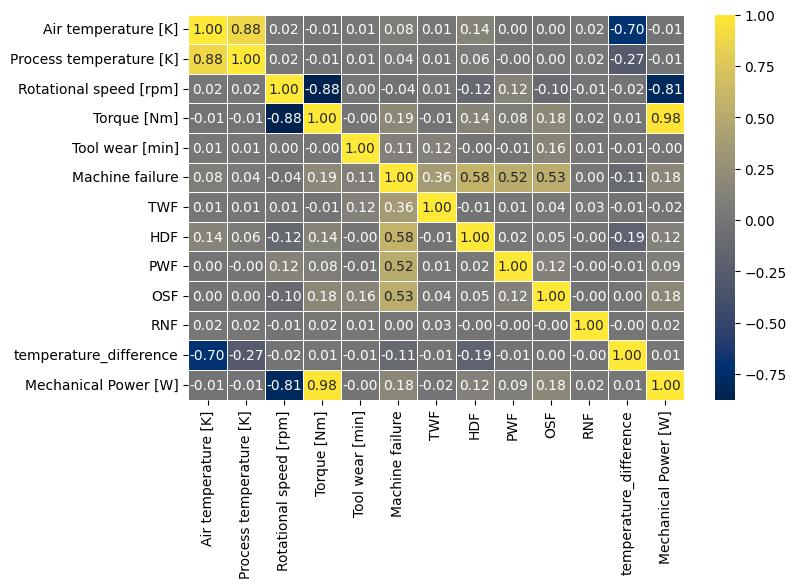

In [ ]:
# Correlation of features

# Checking correlation between numerical features using a heatmap
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='cividis',fmt=".2f", linewidths=0.5)

<Axes: >

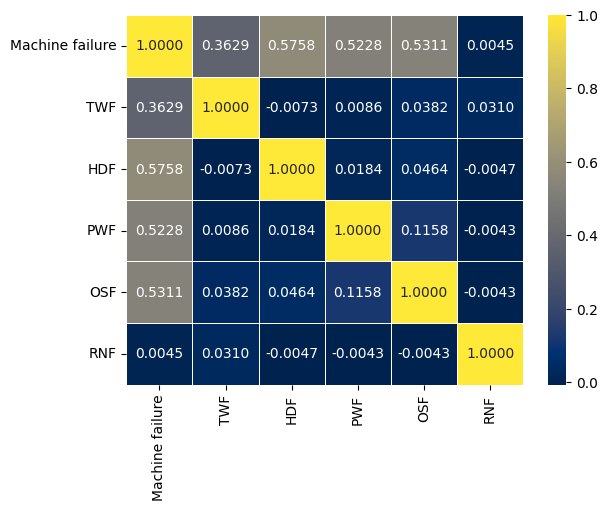

In [ ]:
# Checking correlation between different failure using a heatmap

target=df.iloc[:,[6,7,8,9,10,11]]
target_mat=target.corr()
sns.heatmap(target_mat,annot=True,cmap="cividis",fmt=".4f",linewidth=0.5)

Tool wear failure (TWF), heat dissipation failure (HDF),power failure (PWF),overstrain failure (OSF) and random failures (RNF) shows more positive correlation with target variable i.e. machine failure. Thus dropping columns 'TWF','HDF','PWF','OSF','RNF'.

In [ ]:
df.drop(columns=['TWF','HDF','PWF','OSF','RNF'],inplace=True)
df.sample(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
4505,L,302.4,310.1,1426,46.8,95,0,7.7,6988.6614
8105,L,300.4,311.9,1476,48.7,189,0,11.5,7527.3817
7436,L,300.0,311.4,1487,41.2,22,0,11.4,6415.5930


Encoding Columns & FEATURE SCALING

In [ ]:
# Label encoding categorical variables (column- Type)
from sklearn.preprocessing import LabelEncoder
df['Type'] = LabelEncoder().fit_transform(df['Type'])

# Scaling numerical features using StandardScaler for model compatibility
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data=pd.DataFrame(scale.fit_transform(df),columns=df.columns,index=df.index)
data.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
8134,-0.332223,-0.152453,0.737662,0.620409,-0.761093,-0.753343,-0.187322,1.397911,-0.638420
749,-0.332223,-1.702330,-1.351765,2.449999,-1.774292,1.571838,-0.187322,1.397911,-1.555812
9134,-0.332223,-1.152374,-0.879959,-0.500773,0.021376,-0.203469,-0.187322,0.998328,-0.168490
1263,-0.332223,-1.102378,-0.542955,-0.774096,1.696664,-1.161821,-0.187322,1.397911,1.932077
5631,-0.332223,1.397424,1.479072,-0.132624,-0.319700,0.849147,-0.187322,-0.600004,-0.413550
2113,-0.332223,-0.252445,-0.610355,1.808527,-1.754228,-0.454840,-0.187322,-0.400212,-1.770861
5513,1.333889,1.397424,1.479072,-0.484039,1.034575,-0.753343,-0.187322,-0.600004,1.282153
6623,1.333889,0.847468,0.468059,-0.539819,0.111661,-0.297733,-0.187322,-0.999587,-0.068770
2921,-0.332223,0.397503,-0.138549,0.659455,-0.891505,0.676329,-0.187322,-0.999587,-0.827508
732,-0.332223,-1.402354,-0.947360,2.148786,-1.794355,0.864857,-0.187322,1.397911,-1.711710


Splitting data into features (X) and target (y)

In [ ]:
Y=df.pop("Machine failure")
X=df

In [ ]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],temperature_difference,Mechanical Power [W]
0,2,298.1,308.6,1551,42.8,0,10.5,6951.5906
1,1,298.2,308.7,1408,46.3,3,10.5,6826.7227
2,1,298.1,308.5,1498,49.4,5,10.4,7749.3875
3,1,298.2,308.6,1433,39.5,7,10.4,5927.5047
4,1,298.2,308.7,1408,40.0,9,10.5,5897.8166
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,9.6,4955.1294
9996,0,298.9,308.4,1632,31.8,17,9.5,5434.7040
9997,2,299.0,308.6,1645,33.4,22,9.6,5753.6175
9998,0,299.0,308.7,1408,48.5,25,9.7,7151.1026


In [ ]:
Y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


Handling Imbalanced Data

In [ ]:
# SMOTE- Synthetic Minority Over-sampling Technique
# SMOTE is a method for handling imbalanced datasets in machine learning.
# Goal: To increase the number of instances in the minority class by creating synthetic samples.
# How it works: SMOTE generates new examples by interpolating between existing minority class instances and their nearest neighbors.
# This helps the model learn better about the minority class and improves its performance on imbalanced datasets.

# print distribution of class before SMOTE
from collections import Counter

counts = Counter(Y)
print(counts)


Counter({0: 9661, 1: 339})


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)


In [ ]:
# print distribution of class AFTER SMOTE

from collections import Counter

counts = Counter(y_resampled )
print(counts)


Counter({0: 9661, 1: 9661})


Train Test Split

In [ ]:
#Performing train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.1)

In [ ]:
# Importing machine learning models

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
        'Logistic Regression CV': LogisticRegressionCV(),
    'SGD': SGDClassifier(),

    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
# Creating a function to fit models on our dataset and check which model gives highest accuracy

def evaluate_model(X_train,X_test,Y_train,Y_test):
    result=[]
    for name, model in models.items():
        model.fit(X_train,Y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(Y_test,y_pred)
        result.append((name,acc))
    # Sort models by accuracy
    result.sort(key=lambda x: x[1], reverse=True)
    return result



In [ ]:
results = evaluate_model(X_train,X_test,Y_train,Y_test)

print("Model Performance:")
for name, acc in results:
    print(f"{name}: {acc:.6f}")

Model Performance:
Random Forest: 0.988101
Bagging: 0.982411
Decision Tree: 0.971029
Gradient Boosting: 0.957579
K-Nearest Neighbors: 0.942576
AdaBoost: 0.913088
Logistic Regression CV: 0.862390
Logistic Regression: 0.861873
Support Vector Machine: 0.814278
SGD: 0.606311


In [ ]:
 RF=RandomForestClassifier(class_weight='balanced')

In [ ]:
RF.fit(X_train,Y_train)
y_pred=RF.predict(X_test)
acc=accuracy_score(Y_test,y_pred)
acc

0.9839627521986549

In [ ]:
# model performances using accuracy, precision, recall, and F1-score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(f"--------- {model_name} Classification Report ------ \n\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    roc_auc = roc_auc_score(y_test, y_prob)
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{model_name} - ROC Curve (AUC = {roc_auc:.2f})")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.show()


--------- Random Forest Classification Report ------ 


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       960
           1       0.98      0.99      0.98       973

    accuracy                           0.98      1933
   macro avg       0.98      0.98      0.98      1933
weighted avg       0.98      0.98      0.98      1933



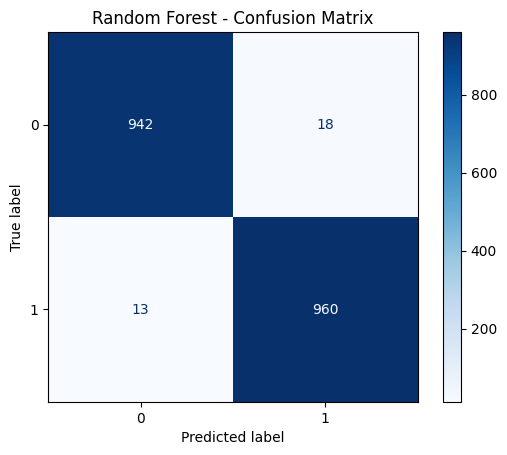

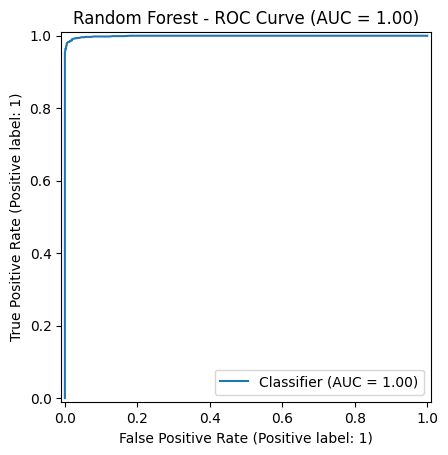

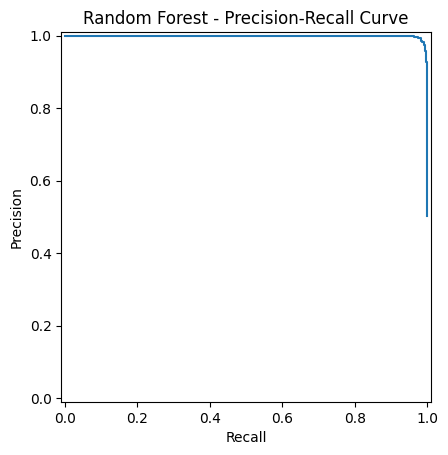

In [ ]:
evaluate_model(RF, X_test, Y_test, model_name="Random Forest")
